# 2.4 Transformation of Densities
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/MendeBadra/DeepLearningBishopFigures/blob/main/Chap2-Transformation-Densities.ipynb)

Transformation of densities is highlighted in the Bishop book because of interesting properties which makes it related to *Normalizing flows* models and it also highlights main difference between probability density functions and simple functions under a transformation (i.e., change of variable).


In [1]:
import Pkg
# Pkg.activate()
Pkg.status()

Status `~/.julia/environments/v1.11/Project.toml`
  [79e6a3ab] Adapt v4.4.0
  [336ed68f] CSV v0.10.15
  [a93c6f00] DataFrames v1.8.1
  [7073ff75] IJulia v1.33.0
  [b2108857] Lux v1.27.1
  [ee78f7c6] Makie v0.24.8
  [91a5bcdd] Plots v1.41.2
  [3c362404] Reactant v0.2.182


due to Julia precompilation, following cell will take quite a while to finish. (8m)

In [3]:
#Pkg.add(["Plots", "StatsBase", "Distributions", "LaTeXStrings"])
Pkg.add(["StatsBase", "Distributions", "LaTeXStrings"])

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed StatsBase ───── v0.34.10
   Installed Distributions ─ v0.25.123
    Updating `~/.julia/environments/v1.11/Project.toml`
  [31c24e10] + Distributions v0.25.123
  [b964fa9f] + LaTeXStrings v1.4.0
  [2913bbd2] + StatsBase v0.34.10
    Updating `~/.julia/environments/v1.11/Manifest.toml`
  [31c24e10] ↑ Distributions v0.25.122 ⇒ v0.25.123
  [2913bbd2] ↑ StatsBase v0.34.9 ⇒ v0.34.10
Precompiling project...
   4331.0 ms  ✓ StatsBase
   1556.1 ms  ✓ PDMats → StatsBaseExt
  10964.5 ms  ✓ Distributions
   3144.8 ms  ✓ Distributions → DistributionsTestExt
   3211.1 ms  ✓ Distributions → DistributionsChainRulesCoreExt
   4383.7 ms  ✓ KernelDensity
 224076.2 ms  ✓ Plots
  10097.2 ms  ✓ Plots → IJuliaExt
  10990.0 ms  ✓ Plots → UnitfulExt
  11759.3 ms  ✓ Plots → GeometryBasicsExt
  11075.4 ms  ✓ Plots → FileIOExt
 486883.5 ms  ✓ Makie
  12 dependencies successfully precompiled in 520 seconds. 45

In [4]:
using Plots, StatsBase, Distributions, LaTeXStrings

In [5]:
# change of variable
g(y) = log(y) - log(1 - y) + 5

g (generic function with 1 method)

In [6]:
g_inv(x) = 1 / (1 + exp(-x + 5)) # this is a logistic sigmoid function

g_inv (generic function with 1 method)

In [7]:
xs = 0.0:0.01:10.0

0.0:0.01:10.0

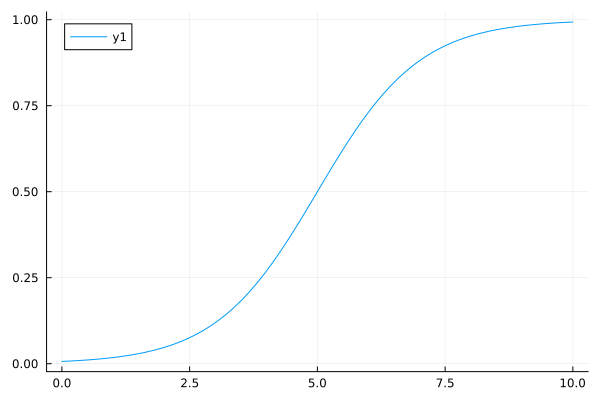

In [8]:
plot(xs, g_inv.(xs))

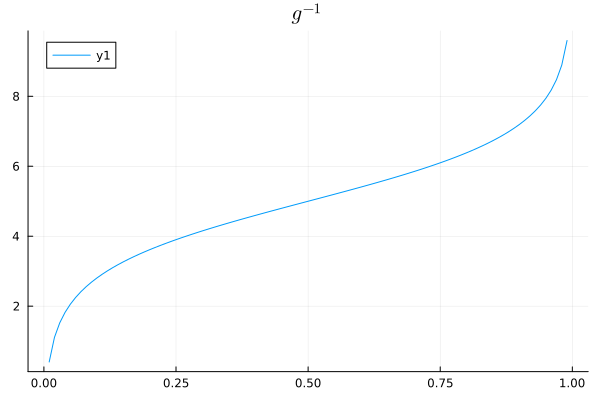

In [9]:
plot(0.0:0.01:1.0, @.( log(xs) - log(max(1 - xs, 0.0)) + 5), title=L"g^{-1}")

In [10]:
normal = Normal(7, 1.0)

Normal{Float64}(μ=7.0, σ=1.0)

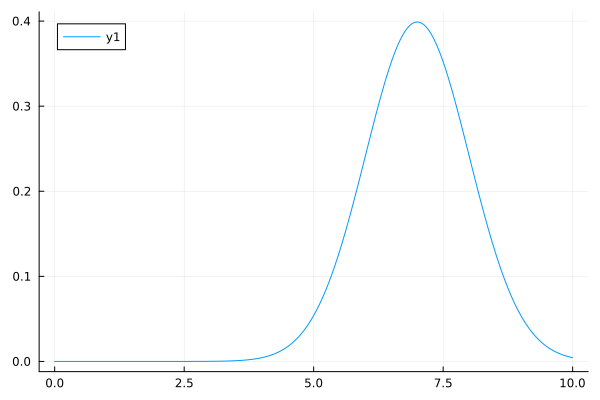

In [26]:
plot(xs, pdf.(normal, xs))

In [27]:
const SAMPLE_SIZE = 50000
smpl = rand(normal, SAMPLE_SIZE)

50000-element Vector{Float64}:
 7.2844004556830555
 7.366568204481777
 7.8468949182973
 6.736576997029809
 8.629673388727618
 7.359117919543623
 8.136365109889969
 6.754281920666324
 6.258130350394023
 8.957570624903255
 6.714409239076
 4.694386737922416
 5.71632762598684
 ⋮
 8.559786599498027
 7.2607785054396485
 7.965581895872141
 5.710886084130178
 7.61612888793662
 6.876732519642277
 6.820251783130801
 6.653318015281308
 7.451627990840226
 4.380297695934146
 6.936037077916266
 7.790090421976596

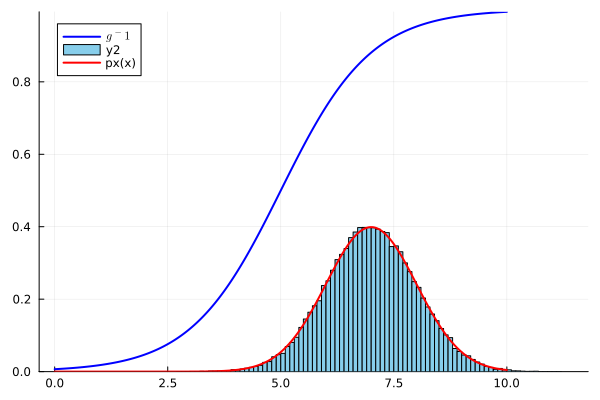

In [28]:
plot(xs, g_inv.(xs), label=L"g^-1", color=:blue, linewidth=2)

# histogram!(smpl ./ sum(smpl))
histogram!(smpl, normalize=true, color=:skyblue)
p_x(x) = pdf(normal, x)
ys = p_x.(xs)
plot!(xs, ys, label="px(x)", color=:red, linewidth=2)



In this example, the `pdf` of the $p_x(x)$ is Normal Bell curve. As a function, it's

$$  f(x; \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}}
\exp \left( - \frac{(x - \mu)^2}{2 \sigma^2} \right)
$$

As in our example, the $\sigma^2=1$, hence:

$$ f(x; \mu) = \frac{1}{\sqrt{2 \pi}}
\exp \left( - \frac{(x - \mu)^2}{2} \right)
$$

Now we change the variables


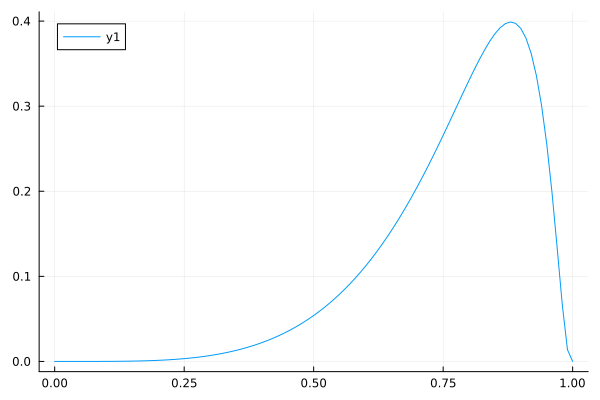

In [14]:
# Transformation x = g(y)
p_x_transformed_as_function = p_x ∘ g # p_x(g(y))

let
    xs = 0.0:0.01:1.0
    plot(xs, p_x_transformed_as_function.(xs))
end

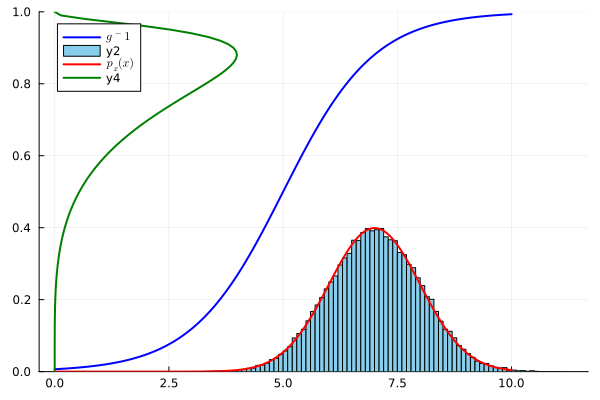

In [17]:
plot(xs, g_inv.(xs), label=L"g^-1", color=:blue, linewidth=2)

# histogram!(smpl ./ sum(smpl))
histogram!(smpl, normalize=true, color=:skyblue)
p_x(x) = pdf(normal, x)
ys = p_x.(xs)
plot!(xs, ys, label=L"p_x(x)", color=:red, linewidth=2)

yr = 0.0:0.01:1.0
xr = p_x_transformed_as_function.(yr)

plot!(xr .* 10, yr, color=:green, linewidth=2)




## Change of variable for `pdf`s
This is the a "magic" formula that is shown in the Bishop book. It's is the `(2.71)` formula.

$$ p_y(y) = p_x(x) | \frac{dx}{dy} | = p_x(g(y))  | \frac{dg}{dy} | $$

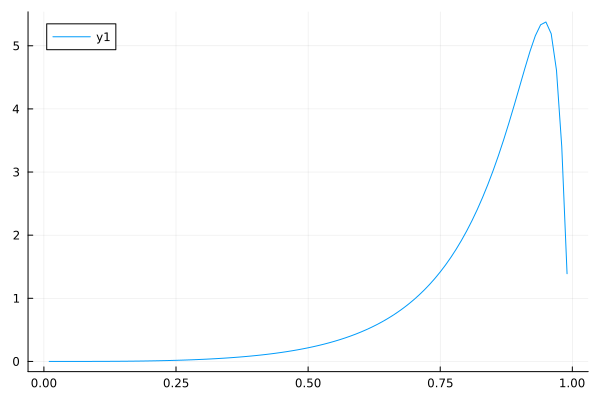

In [18]:
dgdy(y) = 1/y + 1/(1-y) # derivative of g
p_y(y) = (p_x ∘ g)(y) * (abs ∘ dgdy)(y)
# could've written p_x(g(y)) * abs(dgdy(y))
# but abused the function composition \circ notation here

let
    ys = 0.0:0.01:1.0
    plot(ys, p_y.(ys))
end

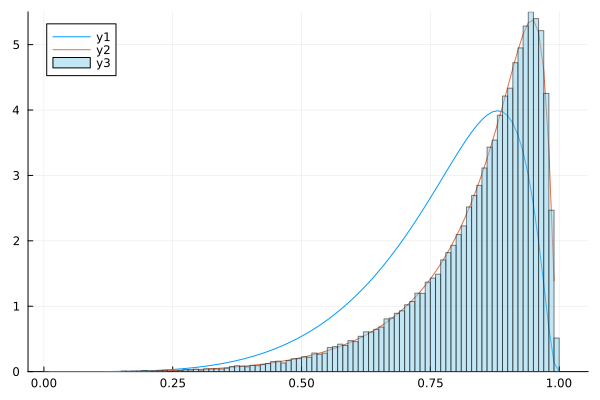

In [19]:
let
    xs = 0.0:0.01:1.0
    plot(xs, 10 .* p_x_transformed_as_function.(xs))
    plot!(xs, p_y.(xs))

    ysmpl = g_inv.(smpl)
    histogram!(ysmpl, normalize=true, color=:skyblue, alpha=0.5)
end

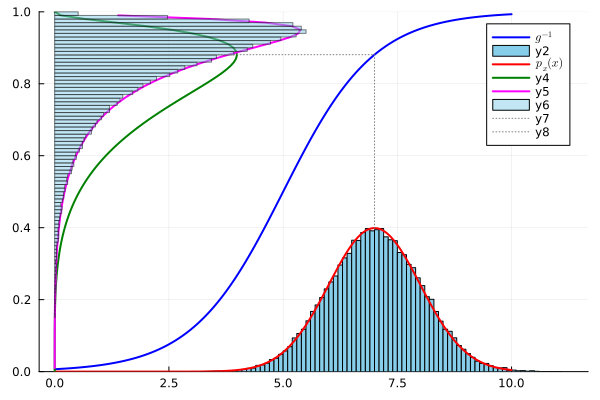

In [21]:
plot(xs, g_inv.(xs), label=L"g^{-1}", color=:blue, linewidth=2)

# histogram!(smpl ./ sum(smpl))
histogram!(smpl, normalize=true, color=:skyblue)
p_x(x) = pdf(normal, x)
ys = p_x.(xs)
plot!(xs, ys, label=L"p_x(x)", color=:red, linewidth=2)

yr = 0.0:0.01:1.0
xr = p_x_transformed_as_function.(yr)

const NORMALIZATION = 10
plot!(xr .* NORMALIZATION, yr, color=:green, linewidth=2)

xr_2 = p_y.(yr)
plot!(xr_2, yr, color=:magenta, linewidth=2)

# ysmpl = g_inv.(smpl)
# histogram!(ysmpl, normalize=true, color=:skyblue, alpha=0.5)

ysmpl = g_inv.(smpl)
histogram!(ysmpl, normalize=true, color=:skyblue, alpha=0.5, orientation=:horizontal, ylims=(0.,1.))

xval = 7.0
yval = g_inv(xval)

# plot!([ xval], [yval, yref], linestyle=:dot, color=:gray)
plot!([xval, xval], [p_x(xval), yval], linestyle=:dot, color=:gray)
plot!([0., xval], [yval, yval], linestyle=:dot, color=:gray)
# bar!(ysmpl, normalize=true, color=:skyblue, alpha=0.5)

# savefig("chap2-transform-density.png")

In [22]:
g_inv(7.0)

0.8807970779778823

In [23]:
a = isnan.(xr_2)
a = broadcast(a) do x
    !x
end
maximum(xr_2[a])

5.376859899922255

## Reflection by `y=x` line

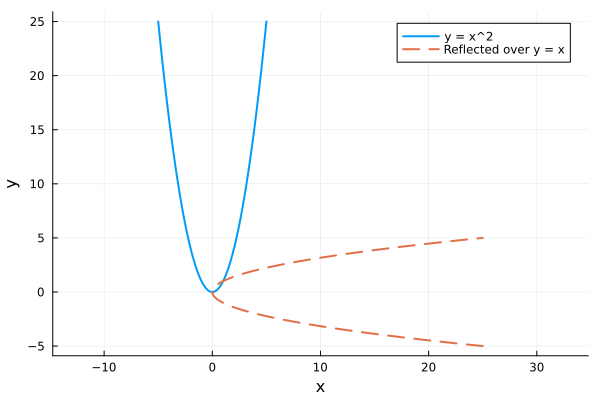

In [ ]:
let
    # Original function
    x = -5:0.1:5
    y = x .^ 2

    # Reflection over y = x → swap x and y
    xr = y
    yr = x

    # Plot both
    plot(x, y, label = "y = x^2", lw=2)
    plot!(xr, yr, label = "Reflected over y = x", lw=2, linestyle=:dash)
    plot!(xlabel = "x", ylabel = "y", legend = :topright, aspect_ratio = :equal)
end

I've been wondering how the appropriate transformation function is found to have any kind of distribution. Turns out it becomes a simple differential equation.

Let $x ∼ q(x)$ be a random variable with a known distribution and
$y = f(x)$ be a monotonic, differentiable transformation function. Then $y ∼ p_y(y)$ is a random variable with any target density function.

Recall that the (2.71) formula when $x = g(y)$:
$$p_y(y) = p_x(x) \left| \frac{dx}{dy} \right|$$

For our problem, it's:
$$p_y(y) = q(x) \left| \frac{dx}{dy} \right|$$

(Thanks to Masoumeh Vali) If $f(x)$ is monoton, then, $\frac{dx}{dy} = \frac{1}{f'(x)}$ and therefore

$$p_y(f(x)) = \frac{q(x)}{f'(x)}$$

This results in following differential equation:
$$f'(x) = \frac{q(x)}{p_y(f(x))}$$

There is the conditions that $f(x)$ is monoton, differentiable and $f'(x) > 0$ which basically ensures that the transformation is invertible.

In [ ]:
# Let's get the OrdinaryDiffEq.jl from the DifferentialEquations.jl metapackage
Pkg.add("OrdinaryDiffEq") # this is done to save precompilation time

   Resolving package versions...
   Installed JpegTurbo_jll ─────────────────────── v3.1.4+0
   Installed OrdinaryDiffEqRKN ─────────────────── v1.9.0
   Installed Enzyme_jll ────────────────────────── v0.0.238+0
   Installed SciMLPublic ───────────────────────── v1.0.1
   Installed Accessors ─────────────────────────── v0.1.43
   Installed Preferences ───────────────────────── v1.5.1
   Installed OrdinaryDiffEqStabilizedRK ────────── v1.8.0
   Installed Opus_jll ──────────────────────────── v1.6.0+0
   Installed OrdinaryDiffEqRosenbrock ──────────── v1.22.0
   Installed TimerOutputs ──────────────────────── v0.5.29
   Installed StaticArrays ──────────────────────── v1.9.16
   Installed OrdinaryDiffEqSDIRK ───────────────── v1.11.0
   Installed FastGaussQuadrature ───────────────── v1.1.0
   Installed PDMats ────────────────────────────── v0.11.37
   Installed SciMLLogging ──────────────────────── v1.8.0
   Installed LuxLib ────────────────────────────── v1.15.2
   Installed NNlib ────

## Multivariate distribution